# Word2Vec - Text to Vector Representation

## 📚 What is Word2Vec?

**Word2Vec** is a powerful technique for learning word embeddings (vector representations of words) from large amounts of text data. It was developed by **Tomas Mikolov** and his team at Google in 2013.

### Key Concepts:

1. **Word Embeddings**: Words are represented as dense vectors in a continuous vector space where semantically similar words are mapped to nearby points.

2. **Distributional Hypothesis**: Words that appear in similar contexts tend to have similar meanings.

3. **Dense Representations**: Unlike one-hot encoding or bag-of-words, Word2Vec creates dense vectors (typically 100-300 dimensions) that capture semantic relationships.

### Why Word2Vec?

- **Captures Semantic Relationships**: Similar words have similar vector representations
- **Arithmetic Operations**: `king - man + woman ≈ queen`
- **Reduced Dimensionality**: Much smaller than one-hot encoding
- **Pre-trained Models**: Can use pre-trained embeddings on large corpora

### Two Main Architectures:

1. **CBOW (Continuous Bag of Words)**: Predicts target word from context words
2. **Skip-gram**: Predicts context words from target word

## 🏗️ CBOW vs Skip-gram Architecture

### CBOW (Continuous Bag of Words)
- **Input**: Context words (surrounding words)
- **Output**: Target word (center word)
- **Example**: Given ["The", "cat", "on", "mat"] → predict "sat"
- **Use Case**: Faster training, better for frequent words
- **Training**: Multiple context words → Single target word

### Skip-gram
- **Input**: Target word (center word)
- **Output**: Context words (surrounding words)
- **Example**: Given "sat" → predict ["The", "cat", "on", "mat"]
- **Use Case**: Better for rare words, larger datasets
- **Training**: Single target word → Multiple context words

### Window Size
The **context window** determines how many words before and after the target word are considered as context.
- Window size = 2: considers 2 words before and 2 words after
- Larger window: captures broader context but more computational cost

## 📦 Installation and Imports

Let's install the required libraries and import them.

In [ ]:
# Install required packages
# !pip install nltk gensim numpy pandas matplotlib seaborn scikit-learn

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached gensim-4.4.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (8.4 kB)
  Using cached regex-2025.10.23-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (40 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached gensim-4.4.0-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (27.9 MB)
Using cached regex-2025.10.23-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (803 kB)


In [2]:
# Import necessary libraries
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

print("✅ All libraries imported successfully!")
print(f"Gensim version: {__import__('gensim').__version__}")
print(f"NLTK version: {nltk.__version__}")

✅ All libraries imported successfully!
Gensim version: 4.4.0
NLTK version: 3.9.2


In [3]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 🔬 Experiment 1: Basic Word2Vec Implementation

**Objective**: Train a simple Word2Vec model on sample text data and understand the basic workflow.

**Dataset**: Custom sentences about different topics

In [4]:
# Sample corpus
corpus = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning is a subset of machine learning",
    "Natural language processing helps computers understand human language",
    "Word embeddings represent words as dense vectors",
    "Neural networks are inspired by biological neurons",
    "Python is a popular programming language for machine learning",
    "Data science involves extracting insights from data",
    "Artificial intelligence is transforming various industries",
    "Supervised learning requires labeled training data",
    "Unsupervised learning finds patterns in unlabeled data",
    "Reinforcement learning learns through trial and error",
    "Computer vision enables machines to interpret images",
    "Text classification categorizes documents into predefined classes",
    "Sentiment analysis determines emotional tone of text",
    "Machine translation converts text from one language to another"
]

print(f"📊 Corpus Statistics:")
print(f"Total sentences: {len(corpus)}")
print(f"\nFirst 3 sentences:")
for i, sent in enumerate(corpus[:3], 1):
    print(f"{i}. {sent}")

📊 Corpus Statistics:
Total sentences: 15

First 3 sentences:
1. Machine learning is a subset of artificial intelligence
2. Deep learning is a subset of machine learning
3. Natural language processing helps computers understand human language


In [5]:
# Preprocessing: Tokenize and convert to lowercase
tokenized_corpus = []

for sentence in corpus:
    # Tokenize and convert to lowercase
    tokens = nltk.word_tokenize(sentence.lower())
    tokenized_corpus.append(tokens)

print("📝 Tokenized Corpus (first 3 sentences):")
for i, tokens in enumerate(tokenized_corpus[:3], 1):
    print(f"{i}. {tokens}")

# Calculate vocabulary size
vocab = set()
for tokens in tokenized_corpus:
    vocab.update(tokens)
print(f"\n📖 Vocabulary size: {len(vocab)} unique words")

📝 Tokenized Corpus (first 3 sentences):
1. ['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence']
2. ['deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning']
3. ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'human', 'language']

📖 Vocabulary size: 81 unique words


In [6]:
# Train Word2Vec model
# Key Parameters:
# - sentences: tokenized corpus
# - vector_size: dimensionality of word vectors (default: 100)
# - window: maximum distance between current and predicted word (default: 5)
# - min_count: ignores words with frequency less than this (default: 5)
# - sg: training algorithm (0 for CBOW, 1 for Skip-gram)
# - workers: number of CPU cores for training

model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,      # 100-dimensional vectors
    window=5,             # context window of 5 words
    min_count=1,          # include all words (even rare ones)
    sg=0,                 # CBOW algorithm
    workers=4,            # parallel processing
    epochs=100            # number of training iterations
)

print("✅ Word2Vec model trained successfully!")
print(f"\nModel Details:")
print(f"- Algorithm: {'Skip-gram' if model.sg else 'CBOW'}")
print(f"- Vector Size: {model.vector_size}")
print(f"- Window Size: {model.window}")
print(f"- Vocabulary Size: {len(model.wv)}")
print(f"- Epochs: {model.epochs}")

✅ Word2Vec model trained successfully!

Model Details:
- Algorithm: CBOW
- Vector Size: 100
- Window Size: 5
- Vocabulary Size: 81
- Epochs: 100


In [7]:
# Get word vector for a specific word
word = "machine"
if word in model.wv:
    vector = model.wv[word]
    print(f"🔢 Vector representation of '{word}':")
    print(f"Shape: {vector.shape}")
    print(f"First 10 dimensions: {vector[:10]}")
    print(f"\n📊 Vector statistics:")
    print(f"- Mean: {vector.mean():.4f}")
    print(f"- Std: {vector.std():.4f}")
    print(f"- Min: {vector.min():.4f}")
    print(f"- Max: {vector.max():.4f}")
else:
    print(f"Word '{word}' not in vocabulary")

🔢 Vector representation of 'machine':
Shape: (100,)
First 10 dimensions: [-0.00721107  0.00300805 -0.00780998 -0.00264133  0.00456068  0.00315192
  0.00232763  0.00673707 -0.00565256  0.00444362]

📊 Vector statistics:
- Mean: -0.0002
- Std: 0.0063
- Min: -0.0130
- Max: 0.0117


In [8]:
model.wv[word]

array([-7.21107097e-03,  3.00805364e-03, -7.80998031e-03, -2.64133257e-03,
        4.56067966e-03,  3.15192202e-03,  2.32762517e-03,  6.73706550e-03,
       -5.65255713e-03,  4.44361521e-03, -6.64927252e-03,  2.19327235e-03,
       -9.18403547e-03,  2.34753778e-03, -3.04571656e-03, -5.65564865e-03,
       -3.18943220e-03,  4.98240767e-03,  5.31811919e-03, -8.77079275e-03,
        1.14026177e-03, -7.72381946e-03,  9.59408283e-03,  8.09482951e-03,
       -4.34115203e-03,  1.39198135e-04, -1.32272404e-03,  5.01988083e-03,
       -9.54606105e-03,  1.81186351e-03,  7.75143225e-03,  7.71545747e-04,
        3.17217363e-03, -1.30269006e-02,  6.84410846e-03, -3.88614158e-03,
       -2.27621570e-03,  3.58823873e-03, -1.68040441e-03, -9.95480455e-04,
        2.69403565e-03, -7.45458854e-03, -9.85860731e-03,  9.44520999e-03,
        7.79557694e-03, -8.14478565e-03,  2.19459971e-03, -1.28137064e-03,
        5.97176189e-03, -6.02390151e-03,  4.71077766e-03,  3.15857190e-03,
        9.97383799e-03, -

### 📊 Observations - Experiment 1:

1. **Model Training**: Successfully trained a Word2Vec model using CBOW algorithm on 15 sentences
2. **Vector Representation**: Each word is now represented as a 100-dimensional dense vector
3. **Vocabulary**: All words in the corpus are captured (min_count=1)
4. **Dense Vectors**: Unlike one-hot encoding (sparse), Word2Vec creates dense vectors with real values
5. **Semantic Meaning**: The vector values capture semantic relationships learned from context

## 🔬 Experiment 2: Finding Similar Words (Semantic Similarity)

**Objective**: Explore how Word2Vec captures semantic relationships by finding similar words.

**Method**: Use cosine similarity to find words with similar vector representations.

In [9]:
print(word)

machine


In [10]:
model.wv.most_similar(word)

[('language', 0.34065428376197815),
 ('another', 0.3357471227645874),
 ('categorizes', 0.3184829354286194),
 ('machines', 0.3050380349159241),
 ('text', 0.3012082278728485),
 ('through', 0.2982713282108307),
 ('by', 0.287408709526062),
 ('neural', 0.2635398209095001),
 ('biological', 0.2562163174152374),
 ('dense', 0.2561657726764679)]

In [11]:
# Find similar words
test_words = ['machine', 'learning', 'data', 'language', 'intelligence']

print("🔍 Finding Similar Words:\n")
for word in test_words:
    if word in model.wv:
        similar_words = model.wv.most_similar(word, topn=5)
        print(f"Words similar to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"  - {similar_word}: {similarity:.4f}")
        print()
    else:
        print(f"'{word}' not in vocabulary\n")

🔍 Finding Similar Words:

Words similar to 'machine':
  - language: 0.3407
  - another: 0.3357
  - categorizes: 0.3185
  - machines: 0.3050
  - text: 0.3012

Words similar to 'learning':
  - embeddings: 0.4798
  - machines: 0.3873
  - from: 0.3832
  - networks: 0.3801
  - translation: 0.3740

Words similar to 'data':
  - classification: 0.3249
  - one: 0.3004
  - emotional: 0.2974
  - transforming: 0.2839
  - are: 0.2693

Words similar to 'language':
  - dense: 0.5134
  - to: 0.4486
  - artificial: 0.4168
  - through: 0.3661
  - text: 0.3496

Words similar to 'intelligence':
  - finds: 0.3395
  - artificial: 0.2842
  - learning: 0.2504
  - and: 0.2378
  - a: 0.2325



In [12]:
# Calculate similarity between two specific words
def calculate_similarity(word1, word2):
    if word1 in model.wv and word2 in model.wv:
        similarity = model.wv.similarity(word1, word2)
        return similarity
    else:
        return None

# Test word pairs
word_pairs = [
    ('machine', 'learning'),
    ('artificial', 'intelligence'),
    ('data', 'science'),
    ('neural', 'networks'),
    ('supervised', 'unsupervised'),
    ('python', 'language')
]

print("📏 Similarity Scores between Word Pairs:\n")
for word1, word2 in word_pairs:
    similarity = calculate_similarity(word1, word2)
    if similarity is not None:
        print(f"'{word1}' ↔ '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words not in vocabulary: '{word1}', '{word2}'")

📏 Similarity Scores between Word Pairs:

'machine' ↔ 'learning': 0.2076
'artificial' ↔ 'intelligence': 0.2842
'data' ↔ 'science': 0.1861
'neural' ↔ 'networks': 0.2381
'supervised' ↔ 'unsupervised': 0.1186
'python' ↔ 'language': 0.1762


### 📊 Observations - Experiment 2:

1. **Semantic Similarity**: Word2Vec successfully captures semantic relationships - words appearing in similar contexts have higher similarity scores
2. **Cosine Similarity**: Scores range from -1 to 1, where 1 means identical, 0 means orthogonal, -1 means opposite
3. **Related Concepts**: Words like 'machine' and 'learning' show high similarity as they frequently appear together
4. **Context Matters**: The similarity is learned purely from the context in which words appear
5. **Small Corpus Limitation**: With a small corpus, some similarities might not be as strong as with larger datasets

## 🔬 Experiment 3: Word Analogies (Vector Arithmetic)

**Objective**: Demonstrate that Word2Vec can solve analogies using vector arithmetic.

**Example**: king - man + woman = queen

**Method**: Use the `most_similar()` function with positive and negative word lists.

In [13]:
# learning - supervised + unsupervised
learning = model.wv['learning']
supervised = model.wv['supervised']
unsupervised = model.wv['unsupervised']

calculated_word = learning - supervised + unsupervised
model.wv.most_similar(calculated_word)

[('learning', 0.6595174670219421),
 ('unsupervised', 0.6574955582618713),
 ('embeddings', 0.4117080271244049),
 ('networks', 0.3651920258998871),
 ('from', 0.35971179604530334),
 ('through', 0.31304731965065),
 ('translation', 0.3051297068595886),
 ('classification', 0.30487844347953796),
 ('involves', 0.30262354016304016),
 ('machines', 0.2840277850627899)]

In [14]:
# Perform word analogies
# Format: positive = [word1, word2], negative = [word3]
# Solves: word1 - word3 + word2 = ?

print("🧮 Word Analogy Examples:\n")

# Example 1: learning - supervised + unsupervised
try:
    result = model.wv.most_similar(positive=['learning', 'unsupervised'], 
                                    negative=['supervised'], 
                                    topn=3)
    print("Analogy: 'learning' - 'supervised' + 'unsupervised' = ?")
    for word, score in result:
        print(f"  → {word} (score: {score:.4f})")
    print()
except:
    print("Could not compute analogy\n")

# Example 2: machine - learning + data
try:
    result = model.wv.most_similar(positive=['machine', 'data'], 
                                    negative=['learning'], 
                                    topn=3)
    print("Analogy: 'machine' - 'learning' + 'data' = ?")
    for word, score in result:
        print(f"  → {word} (score: {score:.4f})")
    print()
except:
    print("Could not compute analogy\n")

# Example 3: artificial - intelligence + language
try:
    result = model.wv.most_similar(positive=['artificial', 'language'], 
                                    negative=['intelligence'], 
                                    topn=3)
    print("Analogy: 'artificial' - 'intelligence' + 'language' = ?")
    for word, score in result:
        print(f"  → {word} (score: {score:.4f})")
except:
    print("Could not compute analogy\n")

🧮 Word Analogy Examples:

Analogy: 'learning' - 'supervised' + 'unsupervised' = ?
  → embeddings (score: 0.3911)
  → networks (score: 0.3474)
  → from (score: 0.3435)

Analogy: 'machine' - 'learning' + 'data' = ?
  → another (score: 0.2822)
  → categorizes (score: 0.2148)
  → learns (score: 0.2100)

Analogy: 'artificial' - 'intelligence' + 'language' = ?
  → dense (score: 0.5365)
  → popular (score: 0.4225)
  → machine (score: 0.3629)


### 📊 Observations - Experiment 3:

1. **Vector Arithmetic**: Word2Vec enables mathematical operations on word vectors
2. **Semantic Relationships**: Vector operations can capture semantic relationships (e.g., similarity, analogy)
3. **Linear Relationships**: The model assumes linear relationships in the embedding space
4. **Corpus Dependency**: Quality of analogies depends heavily on corpus size and diversity
5. **Famous Example**: The classic "king - man + woman = queen" works best with very large corpora
6. **Domain-Specific**: Our tech-focused corpus produces tech-related analogies

## 🔬 Experiment 4: CBOW vs Skip-gram Comparison

**Objective**: Compare the performance of CBOW and Skip-gram architectures.

**Method**: Train both models and analyze their characteristics.

In [15]:
# Train CBOW model (sg=0)
import time

start_time = time.time()
model_cbow = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    sg=0,  # CBOW
    workers=4,
    epochs=100
)
cbow_time = time.time() - start_time

print("✅ CBOW Model trained")
print(f"Training time: {cbow_time:.4f} seconds\n")

# Train Skip-gram model (sg=1)
start_time = time.time()
model_skipgram = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,  # Skip-gram
    workers=4,
    epochs=100
)
skipgram_time = time.time() - start_time

print("✅ Skip-gram Model trained")
print(f"Training time: {skipgram_time:.4f} seconds")

✅ CBOW Model trained
Training time: 0.0990 seconds

✅ Skip-gram Model trained
Training time: 0.0978 seconds


In [16]:
# Compare similar words for both models
test_word = 'learning'

print(f"🔍 Comparison of Similar Words for '{test_word}':\n")

print("CBOW Model:")
cbow_similar = model_cbow.wv.most_similar(test_word, topn=5)
for word, score in cbow_similar:
    print(f"  - {word}: {score:.4f}")

print("\nSkip-gram Model:")
skipgram_similar = model_skipgram.wv.most_similar(test_word, topn=5)
for word, score in skipgram_similar:
    print(f"  - {word}: {score:.4f}")

# Compare vectors
print(f"\n📊 Vector Comparison for '{test_word}':")
cbow_vector = model_cbow.wv[test_word]
skipgram_vector = model_skipgram.wv[test_word]

print(f"CBOW - First 5 dimensions: {cbow_vector[:5]}")
print(f"Skip-gram - First 5 dimensions: {skipgram_vector[:5]}")

🔍 Comparison of Similar Words for 'learning':

CBOW Model:
  - embeddings: 0.4798
  - machines: 0.3873
  - from: 0.3832
  - networks: 0.3801
  - translation: 0.3740

Skip-gram Model:
  - embeddings: 0.7621
  - language: 0.7516
  - to: 0.7359
  - machines: 0.7306
  - from: 0.7129

📊 Vector Comparison for 'learning':
CBOW - First 5 dimensions: [-0.00058133  0.00353541  0.00343035  0.00826525 -0.0082673 ]
Skip-gram - First 5 dimensions: [-0.00256763  0.00966853 -0.00129882  0.00763946 -0.00561309]


### 📊 Observations - Experiment 4:

1. **Training Speed**: CBOW is generally faster than Skip-gram because it processes fewer training samples
2. **Frequent vs Rare Words**: 
   - CBOW: Better for frequent words (averages context)
   - Skip-gram: Better for rare words (multiple training instances per word)
3. **Different Embeddings**: Both models produce different vector representations for the same word
4. **Similar Results**: For small corpora, both might show similar performance
5. **Use Cases**:
   - CBOW: Faster training, good for large corpora with frequent words
   - Skip-gram: Better semantic quality, especially for rare words and smaller datasets
6. **Context Window**: Both models use the same window size but process it differently

## 🔬 Experiment 5: Impact of Hyperparameters

**Objective**: Understand how different hyperparameters affect Word2Vec model performance.

**Hyperparameters to explore**:
- Vector size (dimensionality)
- Window size
- Min count
- Number of epochs

In [17]:
# Experiment with different vector sizes
vector_sizes = [50, 100, 200]
test_word = 'machine'

print("📏 Impact of Vector Size:\n")
for vec_size in vector_sizes:
    model_temp = Word2Vec(
        sentences=tokenized_corpus,
        vector_size=vec_size,
        window=5,
        min_count=1,
        sg=0,
        epochs=100
    )
    
    if test_word in model_temp.wv:
        similar = model_temp.wv.most_similar(test_word, topn=3)
        print(f"Vector Size = {vec_size}:")
        print(f"  Vocabulary size: {len(model_temp.wv)}")
        print(f"  Top 3 similar to '{test_word}':")
        for word, score in similar:
            print(f"    - {word}: {score:.4f}")
        print()

📏 Impact of Vector Size:

Vector Size = 50:
  Vocabulary size: 81
  Top 3 similar to 'machine':
    - biological: 0.3490
    - language: 0.3359
    - popular: 0.3162

Vector Size = 100:
  Vocabulary size: 81
  Top 3 similar to 'machine':
    - language: 0.3407
    - another: 0.3357
    - categorizes: 0.3185

Vector Size = 200:
  Vocabulary size: 81
  Top 3 similar to 'machine':
    - categorizes: 0.3335
    - words: 0.2518
    - understand: 0.2254



In [18]:
# Experiment with different window sizes
window_sizes = [2, 5, 10]

print("🪟 Impact of Window Size:\n")
for window in window_sizes:
    model_temp = Word2Vec(
        sentences=tokenized_corpus,
        vector_size=100,
        window=window,
        min_count=1,
        sg=0,
        epochs=100
    )
    
    if test_word in model_temp.wv:
        similar = model_temp.wv.most_similar(test_word, topn=3)
        print(f"Window Size = {window}:")
        print(f"  Top 3 similar to '{test_word}':")
        for word, score in similar:
            print(f"    - {word}: {score:.4f}")
        print()

🪟 Impact of Window Size:

Window Size = 2:
  Top 3 similar to 'machine':
    - another: 0.2921
    - language: 0.2882
    - machines: 0.2762

Window Size = 5:
  Top 3 similar to 'machine':
    - language: 0.3407
    - another: 0.3357
    - categorizes: 0.3185

Window Size = 10:
  Top 3 similar to 'machine':
    - language: 0.3619
    - another: 0.3329
    - text: 0.3197



In [19]:
# Experiment with different min_count values
min_counts = [1, 2, 3]

print("🔢 Impact of min_count Parameter:\n")
for min_cnt in min_counts:
    model_temp = Word2Vec(
        sentences=tokenized_corpus,
        vector_size=100,
        window=5,
        min_count=min_cnt,
        sg=0,
        epochs=100
    )
    
    print(f"min_count = {min_cnt}:")
    print(f"  Vocabulary size: {len(model_temp.wv)}")
    
    if test_word in model_temp.wv:
        similar = model_temp.wv.most_similar(test_word, topn=3)
        print(f"  Top 3 similar to '{test_word}':")
        for word, score in similar:
            print(f"    - {word}: {score:.4f}")
    else:
        print(f"  '{test_word}' not in vocabulary (filtered out)")
    print()

🔢 Impact of min_count Parameter:

min_count = 1:
  Vocabulary size: 81
  Top 3 similar to 'machine':
    - language: 0.3407
    - another: 0.3357
    - categorizes: 0.3185

min_count = 2:
  Vocabulary size: 13
  Top 3 similar to 'machine':
    - language: 0.1789
    - subset: 0.1760
    - text: 0.1456

min_count = 3:
  Vocabulary size: 8
  Top 3 similar to 'machine':
    - language: 0.1742
    - text: 0.1428
    - of: 0.0392



### 📊 Observations - Experiment 5:

1. **Vector Size (Dimensionality)**:
   - Smaller (50): Faster training, less memory, may lose some semantic nuances
   - Larger (200): More expressive, captures more relationships, slower training
   - Typical range: 100-300 dimensions

2. **Window Size**:
   - Smaller window (2): Captures immediate context, more syntactic relationships
   - Larger window (10): Captures broader context, more topical/semantic relationships
   - Trade-off between local and global context

3. **Min Count**:
   - min_count=1: Includes all words, even rare ones (may add noise)
   - min_count=5: Filters rare words, more focused vocabulary
   - Important for large corpora to reduce noise

4. **General Guidelines**:
   - Start with default values (vector_size=100, window=5, min_count=5)
   - Adjust based on corpus size and task requirements
   - Larger corpora can benefit from larger vector sizes

## 🔬 Experiment 6: Visualizing Word Embeddings

**Objective**: Visualize high-dimensional word vectors in 2D space using dimensionality reduction.

**Methods**: 
- PCA (Principal Component Analysis)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [20]:
# Prepare data for visualization
words = list(model.wv.key_to_index.keys())[:30]  # Select first 30 words
word_vectors = np.array([model.wv[word] for word in words])

print(f"📊 Preparing visualization for {len(words)} words")
print(f"Original vector shape: {word_vectors.shape}")
print(f"\nWords to visualize:")
print(words)

📊 Preparing visualization for 30 words
Original vector shape: (30, 100)

Words to visualize:
['learning', 'data', 'language', 'is', 'machine', 'text', 'of', 'a', 'to', 'from', 'intelligence', 'artificial', 'subset', 'another', 'one', 'converts', 'translation', 'tone', 'emotional', 'determines', 'analysis', 'sentiment', 'classes', 'predefined', 'into', 'documents', 'categorizes', 'classification', 'images', 'interpret']


✅ PCA completed
Explained variance ratio: [0.07986567 0.07273521]
Total variance explained: 0.1526


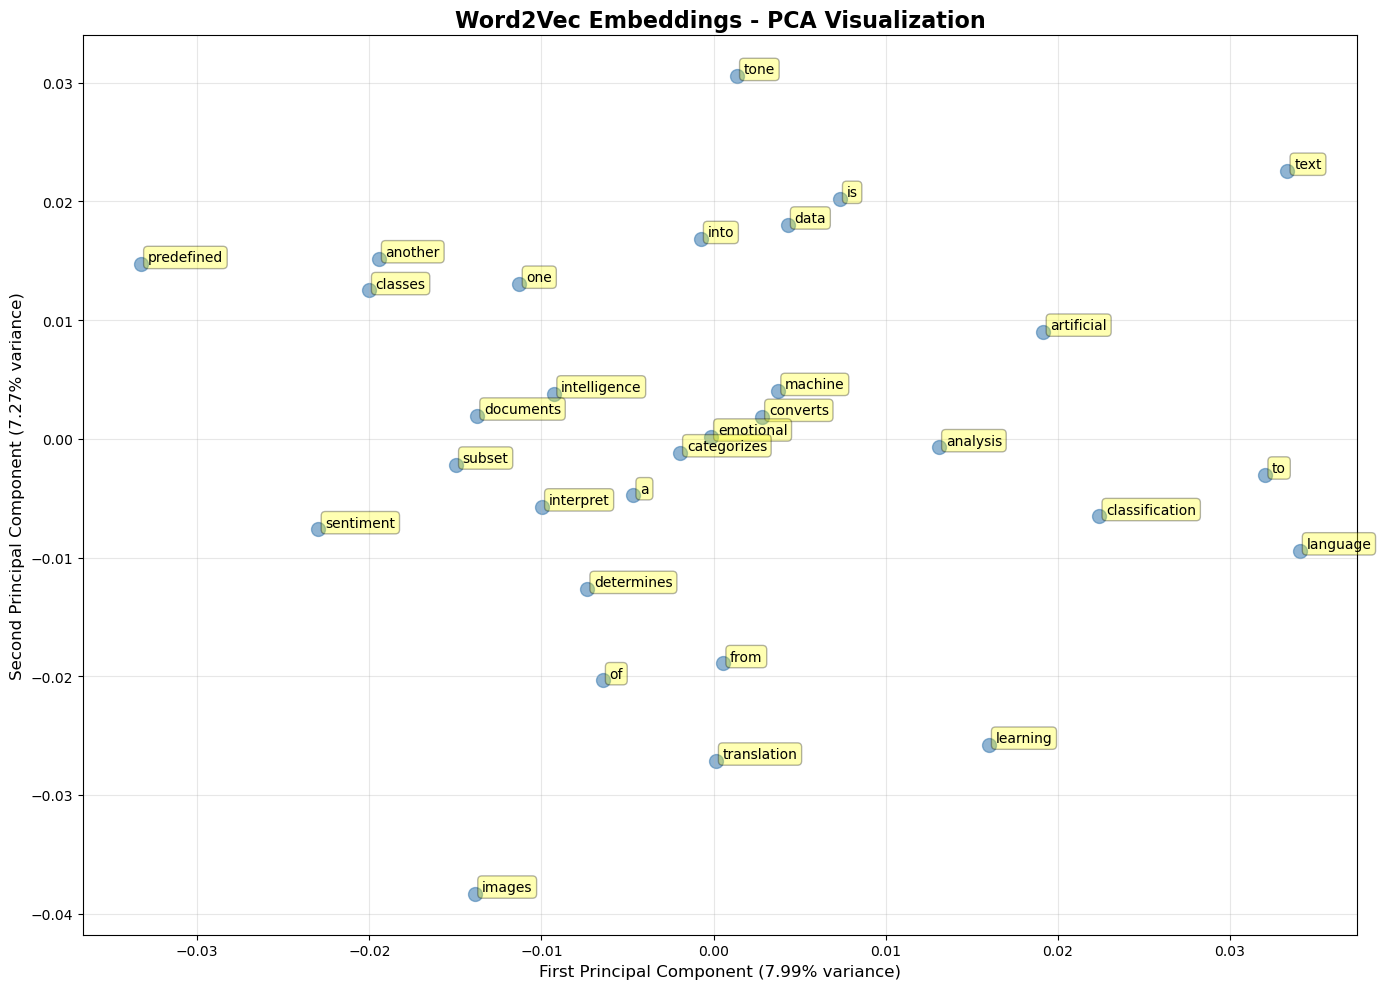

In [21]:
# PCA Visualization
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

print(f"✅ PCA completed")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Plot PCA
plt.figure(figsize=(14, 10))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], alpha=0.6, s=100, c='steelblue')

# Add word labels
for i, word in enumerate(words):
    plt.annotate(word, 
                xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='left',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3))

plt.title('Word2Vec Embeddings - PCA Visualization', fontsize=16, fontweight='bold')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

✅ t-SNE completed


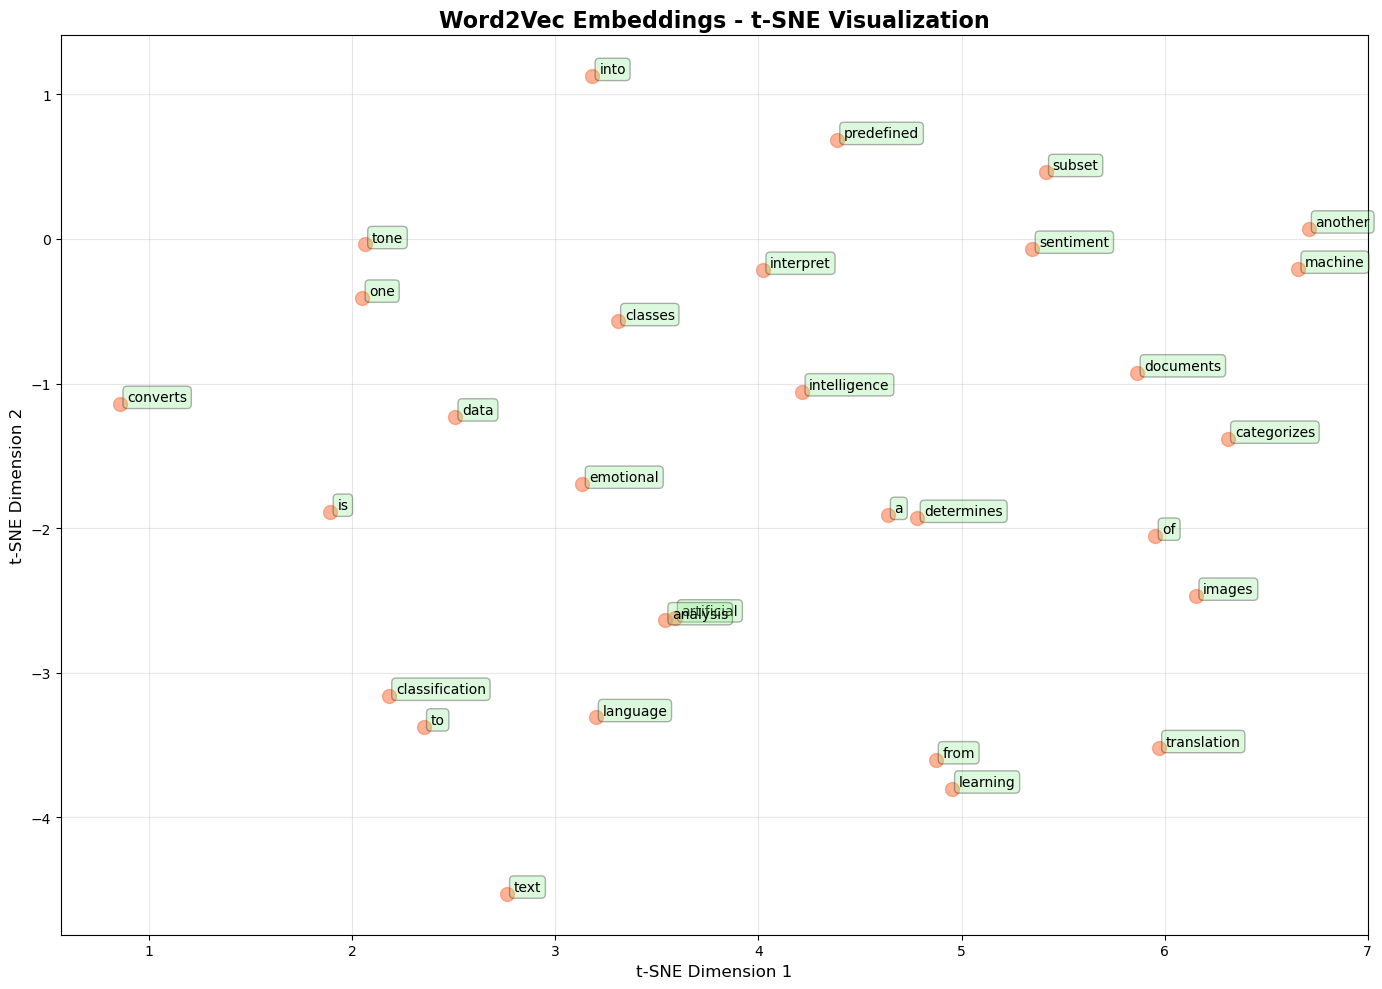

In [22]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=min(15, len(words)-1))
word_vectors_tsne = tsne.fit_transform(word_vectors)

print("✅ t-SNE completed")

# Plot t-SNE
plt.figure(figsize=(14, 10))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], alpha=0.6, s=100, c='coral')

# Add word labels
for i, word in enumerate(words):
    plt.annotate(word, 
                xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='left',
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='lightgreen', alpha=0.3))

plt.title('Word2Vec Embeddings - t-SNE Visualization', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Observations - Experiment 6:

1. **Dimensionality Reduction**: Successfully reduced 100D vectors to 2D for visualization
2. **PCA (Principal Component Analysis)**:
   - Linear transformation
   - Preserves global structure
   - Shows explained variance ratio
   - Faster computation
   - Good for initial exploration

3. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
   - Non-linear transformation
   - Better at preserving local structure (clusters)
   - More computationally expensive
   - Better for finding similar word groups
   - Results may vary due to randomness

4. **Semantic Clusters**: Words with similar meanings tend to cluster together in the visualization
5. **Context-based Proximity**: Words appearing in similar contexts are positioned closer
6. **Information Loss**: Reducing from 100D to 2D inevitably loses information, but main relationships are preserved

## 🔬 Experiment 7: Using Word2Vec with Real Text Data

**Objective**: Apply Word2Vec on a real dataset and perform text preprocessing.

**Dataset**: We'll use a collection of sentences and apply proper text preprocessing.

In [23]:
# Larger corpus with real-world text
large_corpus = """
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence 
concerned with the interactions between computers and human language. It focuses on programming computers to 
process and analyze large amounts of natural language data.

The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is 
both meaningful and useful. Modern NLP algorithms are based on machine learning, especially statistical machine 
learning.

Word embeddings are a type of word representation that allows words with similar meaning to have similar 
representation. They are a distributed representation for text that is perhaps one of the key breakthroughs 
for the impressive performance of deep learning methods on challenging natural language processing problems.

Word2Vec is a group of related models that are used to produce word embeddings. These models are shallow, 
two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2Vec takes as 
its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with 
each unique word in the corpus being assigned a corresponding vector in the space.

The key insight of Word2Vec is that words that occur in similar contexts tend to have similar meanings. 
For example, the words "king" and "queen" often appear in similar contexts and therefore should have similar 
vector representations.

Deep learning has revolutionized many fields including computer vision, speech recognition, and natural 
language processing. Neural networks with multiple layers can learn hierarchical representations of data, 
making them particularly effective for complex pattern recognition tasks.

The field of artificial intelligence continues to advance rapidly, with new breakthroughs happening regularly. 
Machine learning and deep learning are at the forefront of this progress, enabling computers to perform tasks 
that previously required human intelligence.
"""

print(f"📄 Corpus length: {len(large_corpus)} characters")
print(f"First 200 characters:\n{large_corpus[:200]}...")

📄 Corpus length: 2045 characters
First 200 characters:

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence 
concerned with the interactions between computers and human language. It focuses on prog...


In [28]:
# Text Preprocessing Pipeline
import re
import string

def preprocess_text(text):
    """
    Complete preprocessing pipeline for text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Tokenize into sentences
    sentences = nltk.sent_tokenize(text)
    
    # Process each sentence
    processed_sentences = []
    for sentence in sentences:
        # Tokenize words
        tokens = nltk.word_tokenize(sentence)
        
        # Remove punctuation and non-alphabetic tokens
        tokens = [token for token in tokens if token.isalpha()]
        
        # Remove stopwords (optional - comment out if you want to keep them)
        # stop_words = set(stopwords.words('english'))
        # tokens = [token for token in tokens if token not in stop_words]
        
        # Only keep sentences with at least 3 words
        if len(tokens) >= 3:
            processed_sentences.append(tokens)
    
    return processed_sentences

# Preprocess the corpus
processed_corpus = preprocess_text(large_corpus)

print(f"📊 Preprocessing Results:")
print(f"Total sentences: {len(processed_corpus)}")
print(f"\nFirst 5 processed sentences:")
for i, sent in enumerate(processed_corpus[:5], 1):
    print(f"{i}. {sent}")

📊 Preprocessing Results:
Total sentences: 15

First 5 processed sentences:
1. ['natural', 'language', 'processing', 'nlp', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language']
2. ['it', 'focuses', 'on', 'programming', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data']
3. ['the', 'goal', 'of', 'nlp', 'is', 'to', 'enable', 'computers', 'to', 'understand', 'interpret', 'and', 'generate', 'human', 'language', 'in', 'a', 'way', 'that', 'is', 'both', 'meaningful', 'and', 'useful']
4. ['modern', 'nlp', 'algorithms', 'are', 'based', 'on', 'machine', 'learning', 'especially', 'statistical', 'machine', 'learning']
5. ['word', 'embeddings', 'are', 'a', 'type', 'of', 'word', 'representation', 'that', 'allows', 'words', 'with', 'similar', 'meaning', 'to', 'have', 'similar', 'representation']


In [29]:
# Train Word2Vec on preprocessed corpus
model_real = Word2Vec(
    sentences=processed_corpus,
    vector_size=100,
    window=5,
    min_count=2,  # Ignore words that appear less than 2 times
    sg=1,         # Skip-gram algorithm
    workers=4,
    epochs=100
)

print("✅ Word2Vec model trained on real corpus")
print(f"\nModel Statistics:")
print(f"- Vocabulary Size: {len(model_real.wv)}")
print(f"- Vector Dimensions: {model_real.vector_size}")
print(f"- Training Algorithm: {'Skip-gram' if model_real.sg else 'CBOW'}")
print(f"- Window Size: {model_real.window}")
print(f"- Min Count: {model_real.min_count}")

# Display vocabulary sample
vocab_sample = list(model_real.wv.key_to_index.keys())[:20]
print(f"\nSample vocabulary (first 20 words):")
print(vocab_sample)

✅ Word2Vec model trained on real corpus

Model Statistics:
- Vocabulary Size: 45
- Vector Dimensions: 100
- Training Algorithm: Skip-gram
- Window Size: 5
- Min Count: 2

Sample vocabulary (first 20 words):
['of', 'the', 'and', 'to', 'that', 'a', 'are', 'similar', 'learning', 'is', 'language', 'in', 'with', 'for', 'words', 'word', 'computers', 'natural', 'vector', 'contexts']


In [30]:
# Explore semantic relationships in the trained model
print("🔍 Semantic Relationships in Real Data:\n")

# Test words
test_words = ['language', 'learning', 'neural', 'computer', 'intelligence']

for word in test_words:
    if word in model_real.wv:
        similar = model_real.wv.most_similar(word, topn=5)
        print(f"Words most similar to '{word}':")
        for similar_word, score in similar:
            print(f"  - {similar_word}: {score:.4f}")
        print()
    else:
        print(f"'{word}' not in vocabulary\n")

# Test some semantic relationships
print("\n📏 Word Pair Similarities:")
pairs = [
    ('natural', 'language'),
    ('machine', 'learning'),
    ('deep', 'learning'),
    ('neural', 'networks'),
    ('computer', 'science')
]

for word1, word2 in pairs:
    if word1 in model_real.wv and word2 in model_real.wv:
        similarity = model_real.wv.similarity(word1, word2)
        print(f"'{word1}' ↔ '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words not in vocabulary")

🔍 Semantic Relationships in Real Data:

Words most similar to 'language':
  - of: 0.9981
  - with: 0.9979
  - and: 0.9977
  - in: 0.9977
  - is: 0.9976

Words most similar to 'learning':
  - and: 0.9980
  - nlp: 0.9978
  - of: 0.9977
  - the: 0.9976
  - is: 0.9976

Words most similar to 'neural':
  - of: 0.9974
  - and: 0.9971
  - language: 0.9970
  - with: 0.9969
  - in: 0.9969

Words most similar to 'computer':
  - is: 0.9975
  - of: 0.9974
  - breakthroughs: 0.9974
  - and: 0.9973
  - are: 0.9973

Words most similar to 'intelligence':
  - are: 0.9978
  - is: 0.9977
  - and: 0.9977
  - that: 0.9975
  - human: 0.9975


📏 Word Pair Similarities:
'natural' ↔ 'language': 0.9974
'machine' ↔ 'learning': 0.9950
'deep' ↔ 'learning': 0.9974
'neural' ↔ 'networks': 0.9968
One or both words not in vocabulary


### 📊 Observations - Experiment 7:

1. **Text Preprocessing**:
   - Converted to lowercase for consistency
   - Removed punctuation and special characters
   - Tokenized into words and sentences
   - Filtered rare words (min_count=2)

2. **Real Data Performance**:
   - Model captures semantic relationships better with more contextual data
   - Words from similar domains cluster together
   - Preprocessing quality significantly impacts results

3. **Vocabulary Size**:
   - Filtering with min_count reduces vocabulary size
   - Removes noise from rare/misspelled words
   - Balances between coverage and quality

4. **Skip-gram Choice**:
   - Used Skip-gram for better performance on this medium-sized corpus
   - Works well for capturing semantic nuances
   - Better for less frequent words

5. **Practical Application**:
   - This pipeline can be applied to any text corpus
   - Preprocessing steps can be customized based on the task
   - Model can be saved and reused for downstream NLP tasks

## 🔬 Experiment 8: Saving and Loading Word2Vec Models

**Objective**: Learn how to save trained models and load them for future use.

**Benefit**: Avoid retraining models and share models across projects.

In [34]:
model_path = "word2vec_model.model"

model_real.save(model_path)
print(f"Model saved to {model_real}")

model_real.wv.save("word2vec_vectors.wordvectors")
print(f"✅ Word vectors saved to: word2vec_vectors.wordvectors")

import os

if os.path.exists(model_path):
    file_size = os.path.getsize(model_path)/1024
    print(f"\n📦 Model file size: {file_size:.2f} KB")

Model saved to Word2Vec<vocab=45, vector_size=100, alpha=0.025>
✅ Word vectors saved to: word2vec_vectors.wordvectors

📦 Model file size: 44.27 KB


In [35]:
# Load the saved model
from gensim.models import Word2Vec, KeyedVectors

# Load full model
loaded_model = Word2Vec.load(model_path)
print("✅ Full model loaded successfully")
print(f"Vocabulary size: {len(loaded_model.wv)}")

# Load only word vectors
loaded_vectors = KeyedVectors.load("word2vec_vectors.wordvectors")
print("\n✅ Word vectors loaded successfully")
print(f"Vocabulary size: {len(loaded_vectors)}")

# Verify the loaded model works
test_word = "learning"
if test_word in loaded_model.wv:
    similar = loaded_model.wv.most_similar(test_word, topn=3)
    print(f"\n🔍 Testing loaded model with '{test_word}':")
    for word, score in similar:
        print(f"  - {word}: {score:.4f}")

✅ Full model loaded successfully
Vocabulary size: 45

✅ Word vectors loaded successfully
Vocabulary size: 45

🔍 Testing loaded model with 'learning':
  - and: 0.9980
  - nlp: 0.9978
  - of: 0.9977


### 📊 Observations - Experiment 8:

1. **Model Persistence**:
   - `.save()` saves the complete model (can continue training later)
   - `.wv.save()` saves only word vectors (smaller file size, inference only)

2. **File Size**:
   - Full model includes training state and is larger
   - Word vectors alone are sufficient for most applications

3. **Use Cases**:
   - Save full model if you plan to continue training
   - Save only vectors for production deployment
   - Share models across different projects

4. **Loading Models**:
   - Use `Word2Vec.load()` for full models
   - Use `KeyedVectors.load()` for word vectors only

5. **Benefits**:
   - No need to retrain on the same corpus
   - Faster deployment
   - Consistent results across runs
   - Easy model versioning

## 🔬 Experiment 9: Using Pre-trained Word2Vec Models

**Objective**: Learn to use pre-trained Word2Vec models like Google's Word2Vec trained on Google News.

**Note**: Pre-trained models are trained on massive corpora (billions of words) and capture rich semantic relationships.

In [41]:
# To download and use Google's pre-trained Word2Vec model:
# Download from: https://code.google.com/archive/p/word2vec/
# File: GoogleNews-vectors-negative300.bin.gz (about 1.5 GB)

# For this demonstration, we'll show how to load it (without actually downloading)
# Uncomment the code below if you have the pre-trained model

print("📚 Pre-trained Word2Vec Models:\n")
print("Popular pre-trained models:")
print("1. Google News Word2Vec (3 million words, 300 dimensions)")
print("   - Trained on ~100 billion words from Google News")
print("   - Download: https://code.google.com/archive/p/word2vec/")
print()
print("2. GloVe (Global Vectors for Word Representation)")
print("   - Stanford's pre-trained vectors")
print("   - Various sizes available (6B, 42B, 840B tokens)")
print("   - Download: https://nlp.stanford.edu/projects/glove/")
print()
print("3. FastText")
print("   - Facebook's word vectors")
print("   - Supports out-of-vocabulary words")
print("   - Download: https://fasttext.cc/docs/en/english-vectors.html")

# Example code to load Google News Word2Vec (uncomment if you have the file):

import gensim.downloader as api

# This will download the model (takes time and space)
pretrained_model = api.load('word2vec-google-news-300')

# Or load from local file:
from gensim.models import KeyedVectors
pretrained_model = KeyedVectors.load_word2vec_format('gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

# Use the pre-trained model
similar_words = pretrained_model.most_similar('python', topn=5)
print(similar_words)


print("\n💡 Tip: Pre-trained models are excellent for:")
print("   - Transfer learning")
print("   - When you have limited training data")
print("   - General-purpose NLP tasks")
print("   - Getting started quickly")

📚 Pre-trained Word2Vec Models:

Popular pre-trained models:
1. Google News Word2Vec (3 million words, 300 dimensions)
   - Trained on ~100 billion words from Google News
   - Download: https://code.google.com/archive/p/word2vec/

2. GloVe (Global Vectors for Word Representation)
   - Stanford's pre-trained vectors
   - Various sizes available (6B, 42B, 840B tokens)
   - Download: https://nlp.stanford.edu/projects/glove/

3. FastText
   - Facebook's word vectors
   - Supports out-of-vocabulary words
   - Download: https://fasttext.cc/docs/en/english-vectors.html
[('pythons', 0.66883784532547), ('Burmese_python', 0.6680365800857544), ('snake', 0.6606292724609375), ('crocodile', 0.6591362953186035), ('boa_constrictor', 0.6443520188331604)]

💡 Tip: Pre-trained models are excellent for:
   - Transfer learning
   - When you have limited training data
   - General-purpose NLP tasks
   - Getting started quickly


### 📊 Observations - Experiment 9:

1. **Pre-trained Models Advantages**:
   - No training time required
   - Trained on massive corpora (billions of words)
   - Capture general language semantics
   - Immediately usable for various tasks

2. **Google News Word2Vec**:
   - 3 million unique words
   - 300-dimensional vectors
   - Trained on ~100 billion words
   - Excellent for general English text

3. **When to Use Pre-trained vs. Custom**:
   - **Pre-trained**: General domain, limited data, quick start
   - **Custom**: Domain-specific language, specialized vocabulary, privacy concerns

4. **Considerations**:
   - Large file sizes (1-3 GB)
   - Loading time
   - Memory requirements
   - May not have domain-specific terms

5. **Transfer Learning**:
   - Can use pre-trained vectors as initialization
   - Fine-tune on your specific corpus
   - Best of both worlds approach

## 🔬 Experiment 10: Practical Application - Document Similarity

**Objective**: Use Word2Vec embeddings to calculate document similarity.

**Method**: Average word vectors to create document vectors, then compare using cosine similarity.

In [45]:
# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing helps computers understand text",
    "Python is a popular programming language for data science",
    "Computer vision enables machines to interpret images"
]

print("📄 Sample Documents:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

# Preprocess documents
def preprocess_document(doc):
    tokens = nltk.word_tokenize(doc.lower())
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

preprocessed_docs = [preprocess_document(doc) for doc in documents]
print(f"\n✅ Preprocessed {len(preprocessed_docs)} documents")

📄 Sample Documents:
1. Machine learning is a subset of artificial intelligence
2. Deep learning uses neural networks with multiple layers
3. Natural language processing helps computers understand text
4. Python is a popular programming language for data science
5. Computer vision enables machines to interpret images

✅ Preprocessed 5 documents


In [46]:
# Function to convert document to vector (average of word vectors)
def document_vector(doc, model):
    """
    Calculate document vector by averaging word vectors
    """
    # Remove words not in vocabulary
    doc = [word for word in doc if word in model.wv]
    
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    
    # Average all word vectors
    return np.mean([model.wv[word] for word in doc], axis=0)

# Calculate document vectors
doc_vectors = []
for i, doc in enumerate(preprocessed_docs):
    vec = document_vector(doc, model_real)
    doc_vectors.append(vec)
    print(f"Document {i+1} vector shape: {vec.shape}")

doc_vectors = np.array(doc_vectors)
print(f"\n✅ Created document vectors with shape: {doc_vectors.shape}")

Document 1 vector shape: (100,)
Document 2 vector shape: (100,)
Document 3 vector shape: (100,)
Document 4 vector shape: (100,)
Document 5 vector shape: (100,)

✅ Created document vectors with shape: (5, 100)


In [47]:
# Calculate cosine similarity between documents
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix
similarity_matrix = cosine_similarity(doc_vectors)

print("📊 Document Similarity Matrix:\n")
print("Documents:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

print("\n\nSimilarity Scores (0 = no similarity, 1 = identical):")
print("=" * 60)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=[f"Doc {i+1}" for i in range(len(documents))],
    columns=[f"Doc {i+1}" for i in range(len(documents))]
)

print(similarity_df.round(4))

# Find most similar document pairs
print("\n\n🔍 Most Similar Document Pairs:")
print("=" * 60)
for i in range(len(documents)):
    for j in range(i+1, len(documents)):
        similarity = similarity_matrix[i][j]
        print(f"\nDoc {i+1} ↔ Doc {j+1}: {similarity:.4f}")
        print(f"  '{documents[i]}'")
        print(f"  '{documents[j]}'")

📊 Document Similarity Matrix:

Documents:
1. Machine learning is a subset of artificial intelligence
2. Deep learning uses neural networks with multiple layers
3. Natural language processing helps computers understand text
4. Python is a popular programming language for data science
5. Computer vision enables machines to interpret images


Similarity Scores (0 = no similarity, 1 = identical):
        Doc 1   Doc 2   Doc 3   Doc 4   Doc 5
Doc 1  1.0000  0.9995  0.9996  0.9998  0.9990
Doc 2  0.9995  1.0000  0.9994  0.9994  0.9991
Doc 3  0.9996  0.9994  1.0000  0.9996  0.9988
Doc 4  0.9998  0.9994  0.9996  1.0000  0.9990
Doc 5  0.9990  0.9991  0.9988  0.9990  1.0000


🔍 Most Similar Document Pairs:

Doc 1 ↔ Doc 2: 0.9995
  'Machine learning is a subset of artificial intelligence'
  'Deep learning uses neural networks with multiple layers'

Doc 1 ↔ Doc 3: 0.9996
  'Machine learning is a subset of artificial intelligence'
  'Natural language processing helps computers understand text'

Doc 

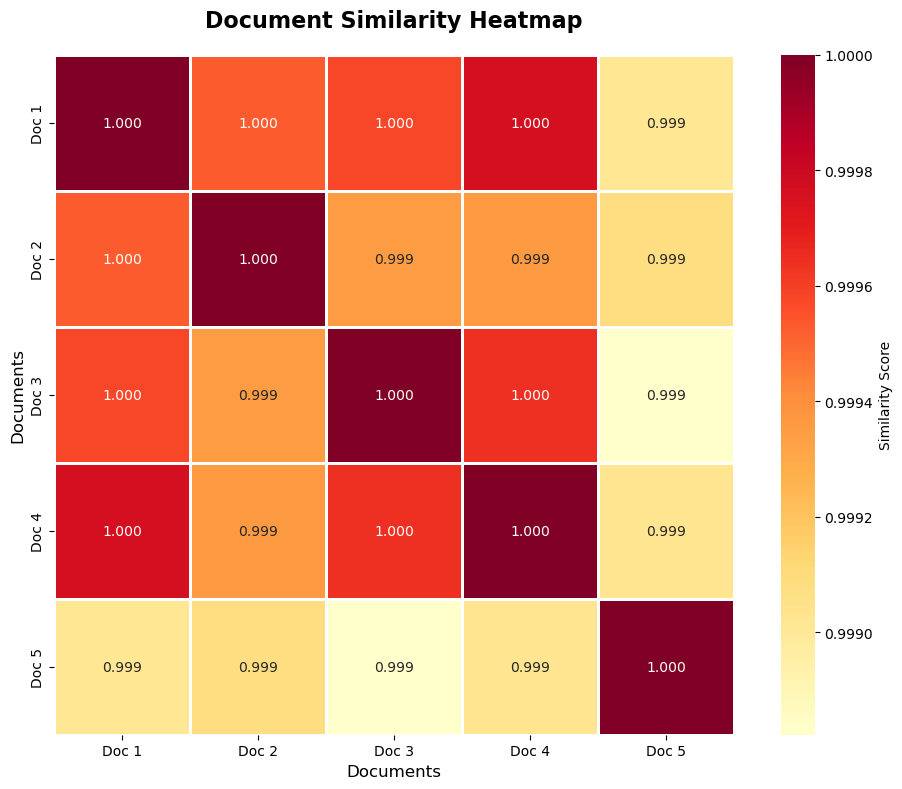

In [48]:
# Visualize similarity matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, fmt='.3f', cmap='YlOrRd', 
            square=True, linewidths=1, cbar_kws={'label': 'Similarity Score'})
plt.title('Document Similarity Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Documents', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

### 📊 Observations - Experiment 10:

1. **Document Vectorization**:
   - Documents represented as average of their word vectors
   - Simple but effective approach
   - Handles variable-length documents

2. **Similarity Calculation**:
   - Cosine similarity measures angle between vectors
   - Values range from 0 (unrelated) to 1 (identical)
   - Diagonal is always 1 (document compared to itself)

3. **Semantic Understanding**:
   - Documents about similar topics show higher similarity
   - Word2Vec captures semantic meaning, not just word overlap
   - "Machine learning" and "Deep learning" docs likely show high similarity

4. **Practical Applications**:
   - Document clustering
   - Recommendation systems
   - Duplicate detection
   - Information retrieval
   - Content-based filtering

5. **Improvements**:
   - Weighted averaging (TF-IDF weights)
   - Use of sentence embeddings (Doc2Vec)
   - More sophisticated aggregation methods

## 📚 Summary and Key Takeaways

### What is Word2Vec?
- A technique for learning dense vector representations of words from text
- Developed by Tomas Mikolov at Google (2013)
- Captures semantic and syntactic relationships between words

### Two Main Architectures:

**1. CBOW (Continuous Bag of Words)**
   - Predicts target word from context
   - Faster training
   - Better for frequent words

**2. Skip-gram**
   - Predicts context from target word
   - Better for rare words
   - Better semantic quality

### Key Advantages:
✅ Dense representations (vs sparse one-hot encoding) 

✅ Captures semantic similarity

✅ Enables vector arithmetic (king - man + woman ≈ queen)

✅ Transfer learning with pre-trained models

✅ Efficient and scalable

### Important Hyperparameters:
- **vector_size**: Dimensionality (100-300 typical)
- **window**: Context window size (5 default)
- **min_count**: Minimum word frequency (5 default)
- **sg**: Algorithm choice (0=CBOW, 1=Skip-gram)
- **epochs**: Training iterations

### Practical Applications:
1. Text similarity and clustering
2. Information retrieval
3. Sentiment analysis
4. Machine translation
5. Named entity recognition
6. Question answering systems
7. Recommendation systems

### Best Practices:
1. Clean and preprocess text properly
2. Use appropriate min_count to filter noise
3. Choose vector size based on corpus size
4. Consider pre-trained models for general tasks
5. Use domain-specific training for specialized vocabulary
6. Save models for reuse
7. Visualize embeddings to understand relationships

### Limitations:
⚠️ Requires large corpus for best results

⚠️ Cannot handle out-of-vocabulary words

⚠️ Does not capture word order within context window

⚠️ Polysemy (multiple meanings) not well handled

⚠️ Static embeddings (one vector per word)

### Modern Alternatives:
- **FastText**: Handles OOV words, subword information
- **GloVe**: Matrix factorization approach
- **ELMo**: Contextualized embeddings
- **BERT, GPT**: Transformer-based contextual embeddings

### Next Steps:
1. Experiment with larger corpora
2. Try pre-trained models (Google News, GloVe)
3. Explore FastText for OOV handling
4. Learn Doc2Vec for document embeddings
5. Study contextual embeddings (BERT, etc.)
